# Baum Methoden Projekt - Lösung

Für dieses Projekt werden wir Entscheidungsbaum und Random Forest dazu nutzen Schulen in öffentliche (public) und private (private) einzuteilen. Dazu schauen wir uns ihre Eigenschaften an.

Verschaffen wir uns zunächst einen Überblick über die Daten. Sie sind in der ISLR Library inbegriffen. Wir verwenden [College Daten](https://cran.r-project.org/web/packages/ISLR/ISLR.pdf).

Der Dataframe beinhaltet 777 Beobachtungen und die folgenden 18 Spalten:

* Private: Ein Faktor mit den Leveln "No" und "Yes", der anzeigt, ob das College ein privates ist oder nicht.
* Apps: Anzahl der erhaltenen Bewerbungen.
* Accept: Anzahl der angenommenen Bewerbungen.
* Enroll: Anzahl der neu eingeschriebenen Studenten.
* Top 10perc: Prozentsatz an Studenten aus den 10% besten Studenten ihrer High School Klassen.
* Top 25perc: Prozentsatz an Studenten aus den 25% besten Studenten ihrer High School Klassen.
* F.Undergrad: Anzahl an Vollzeit Undergrad Studenten
* P.Undergrad: Anzahl an Teilzeit Undergrad Studenten
* Outstate: Kosten, falls "Out-of-state" Status besteht
* Room.Board: Kosten für ein Zimmer und Verpflegung
* Books: Geschätzte Buchkosten
* Personal: Geschätzte persönliche Ausgaben
* PhD: Prozentsatz der Angestellten mit Doktor-Titel
* Terminal: Prozentsatz der Angestellten mit Terminal-Titel
* S.F.Ratio: Studenten pro Fakultät
* perc.alumni: Prozentsatz der Alumni die spenden
* Expend: Einführende Ausgaben pro Student
* Grad.Rate: Abschlussrate

## Die Daten laden

**Rufe die ISLR Library auf und schaue dir den head von "College" an. Anschließend hinterlege den College Dataframe in einem neuen Dataframe namens df.*

*Hinweis: Die College Daten sind in der ISLR Library inbegriffen.*

In [2]:
# install.packages("ISLR")


The downloaded binary packages are in
	/var/folders/l_/ph09zg211515zffvzrp3bb680000gn/T//Rtmp06FKEb/downloaded_packages


In [3]:
library(ISLR)

In [4]:
head(College)

Private Apps Accept Enroll Top10perc Top25perc
Abilene Christian University Yes     1660 1232   721    23        52       
Adelphi University           Yes     2186 1924   512    16        29       
Adrian College               Yes     1428 1097   336    22        50       
Agnes Scott College          Yes      417  349   137    60        89       
Alaska Pacific University    Yes      193  146    55    16        44       
Albertson College            Yes      587  479   158    38        62       
                             F.Undergrad P.Undergrad Outstate Room.Board Books
Abilene Christian University 2885         537         7440    3300       450  
Adelphi University           2683        1227        12280    6450       750  
Adrian College               1036          99        11250    3750       400  
Agnes Scott College           510          63        12960    5450       450  
Alaska Pacific University     249         869         7560    4120       800  
Albertson College             678          41        13500    3335       500  
                             Personal PhD Terminal S.F.Ratio perc.alumni Expend
Abilene Christian University 2200     70  78       18.1      12           7041 
Adelphi University           1500     29  30       12.2      16          10527 
Adrian College               1165     53  66       12.9      30           8735 
Agnes Scott College           875     92  97        7.7      37          19016 
Alaska Pacific University    1500     76  72       11.9       2          10922 
Albertson College             675     67  73        9.4      11           9727 
                             Grad.Rate
Abilene Christian University 60       
Adelphi University           56       
Adrian College               54       
Agnes Scott College          59       
Alaska Pacific University    15       
Albertson College            55

In [5]:
df <- College

## EDA

Untersuchen wir die Daten zunächst visuell.

**Erstelle ein `scatterplot` von `Grad.Rate` vs. `Room.Board` und verwende eine Farbgebung nach `Private`.**

In [6]:
library(ggplot2)

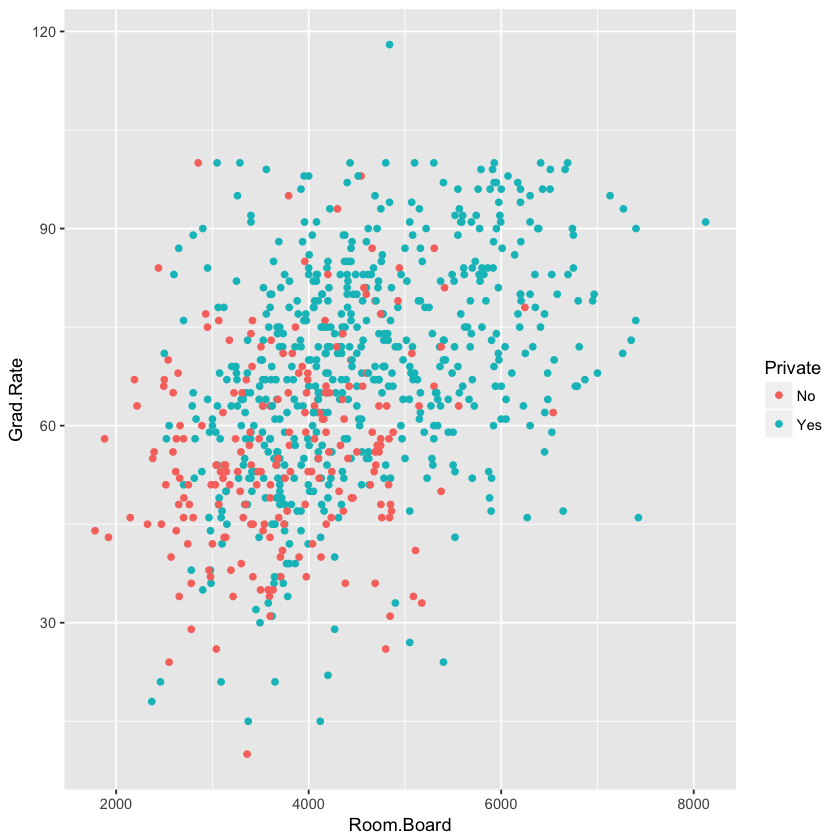

In [7]:
ggplot(df,aes(Room.Board,Grad.Rate)) + geom_point(aes(color=Private))

**Erstelle ein `histogram` der Vollzeit Undergrad Studenten, eingefärbt nach `Private`.**

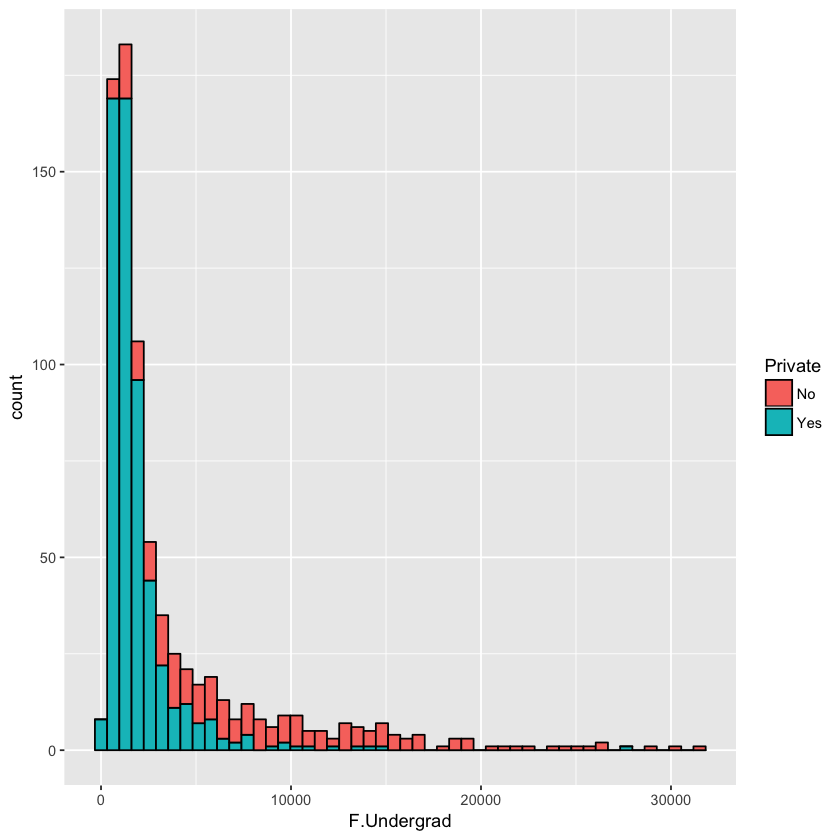

In [8]:
ggplot(df,aes(F.Undergrad)) + geom_histogram(aes(fill=Private),color='black',bins=50)

**Erstelle ein `histogram` der `Grad.Rate` und verwende eine Farbgebung nach `Private`.**
*Hinweis: Hier sollte dir etwas Komisches auffallen!*

In [ ]:
ggplot(df,aes(Grad.Rate)) + geom_histogram(aes(fill=Private),color='black',bins=50)

**Welches College hat eine Abschlussrate von über 100%?**

In [10]:
subset(df,Grad.Rate > 100)

Private Apps Accept Enroll Top10perc Top25perc F.Undergrad
Cazenovia College Yes     3847 3433   527    9         35        1010       
                  P.Undergrad Outstate Room.Board Books Personal PhD Terminal
Cazenovia College 12          9384     4840       600   500      22  47      
                  S.F.Ratio perc.alumni Expend Grad.Rate
Cazenovia College 14.3      20          7697   118

**Ändere dessen Abschlussrate zu 100%.**

In [11]:
df['Cazenovia College','Grad.Rate'] <- 100

## Train Test Split
**Teile deine Daten in Trainings- und Testdaten im Verhältnis 70/30 auf. Verwende dazu die `caTools` Library.**

In [12]:
# install.packages("caTools")


The downloaded binary packages are in
	/var/folders/l_/ph09zg211515zffvzrp3bb680000gn/T//Rtmp06FKEb/downloaded_packages


In [13]:
library(caTools)

set.seed(101) 

sample = sample.split(df$Private, SplitRatio = .70)
train = subset(df, sample == TRUE)
test = subset(df, sample == FALSE)

## Entscheidungsbaum
**Nutze die `rpart` Library um einen Entscheidungsbaum zu erstellen, der vorhersagt ob ein College eine öffentliche oder private Einrichtung ist.**

*Hinweis: Achte darauf hier nur die Trainingsdaten zu verwenden.*

In [14]:
library(rpart)

Warning message:
“package ‘rpart’ was built under R version 3.4.3”

In [15]:
tree <- rpart(Private ~.,method='class',data = train)

**Nutze `predict()`, um die "Private" Einteilung für die Testdaten vorherzusagen.**

In [16]:
tree.preds <- predict(tree,test)

**Schaue dir den Head der Vorhersage an.**

In [17]:
head(tree.preds)

No          Yes      
Adrian College                          0.003311258 0.9966887
Alfred University                       0.003311258 0.9966887
Allegheny College                       0.003311258 0.9966887
Allentown Coll. of St. Francis de Sales 0.003311258 0.9966887
Alma College                            0.003311258 0.9966887
Amherst College                         0.003311258 0.9966887

Dir sollte auffallen, dass wir hier aktuell noch zwei Spalten haben.

**Wandle diese beiden Spalten in eine neue Spalte um, die der ursprünglichen Yes/No Einteilung entspricht.**

In [18]:
tree.preds <- as.data.frame(tree.preds)
# Es gibt viele Wege dies zu tun!
joiner <- function(x){
    if (x>=0.5){
        return('Yes')
    }else{
        return("No")
    }
}

In [19]:
tree.preds$Private <- sapply(tree.preds$Yes,joiner)

In [20]:
head(tree.preds)

No          Yes       Private
Adrian College                          0.003311258 0.9966887 Yes    
Alfred University                       0.003311258 0.9966887 Yes    
Allegheny College                       0.003311258 0.9966887 Yes    
Allentown Coll. of St. Francis de Sales 0.003311258 0.9966887 Yes    
Alma College                            0.003311258 0.9966887 Yes    
Amherst College                         0.003311258 0.9966887 Yes

**Verwende jetzt `table()`, um eine Confusion Matrix zu erstellen.**

In [21]:
table(tree.preds$Private,test$Private)

     
       No Yes
  No   57   9
  Yes   7 160

**Verwende die `rpart.plot` Library und die `prp()` Funktion, um das Entscheidungsbaummodell zu plotten.**

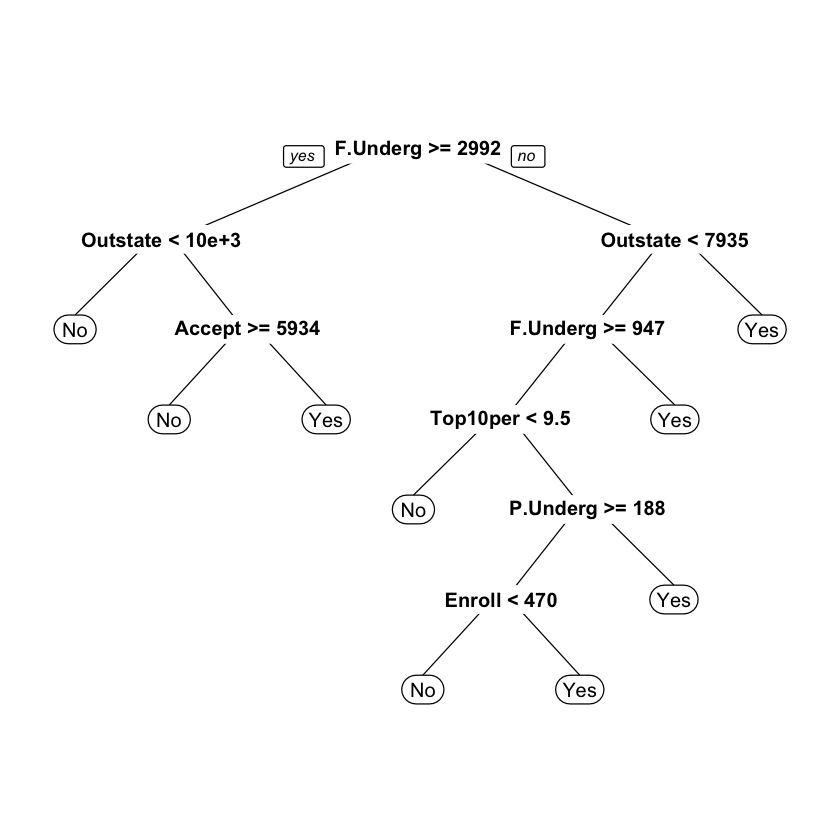

In [22]:
library(rpart.plot)
prp(tree)

## Random Forest

Jetzt erstellen wir ein Random Forest Modell!

**Rufe das `randomForest` Package auf.**

In [23]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: ‘randomForest’

The following object is masked from ‘package:ggplot2’:

    margin



**Jetzt verwende `randomForest()`, um ein Modell zu erstellen, dass die "Private" Klasse vorhersagt. Füge `importance=TRUE` als Parameter zum Modell hinzu.**

*Hinweis: Du kannst mit `help(randomForest)` herausfinden, was dadurch passiert.*

In [24]:
rf.model <- randomForest(Private ~ . , data = train,importance = TRUE)

**Wie ist die Confusion Matrix deines Modells auf den Trainingsdaten? Nutze `model$confusion`.**

In [25]:
rf.model$confusion

No  Yes class.error
No  125  23 0.15540541 
Yes  10 386 0.02525253

**Zeige mit `model$importance` die Wichtigkeit der einzelnen Eigenschaften an.**

*Schaue zusätzlich an, was "Gini" bedeutet. Die Universität Berkley bietet dazu eine gute [Quelle](https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm).*

In [26]:
rf.model$importance

No          Yes          MeanDecreaseAccuracy MeanDecreaseGini
Apps        0.030638008 0.0138490702 0.0183834770          8.191846       
Accept      0.031590637 0.0157698867 0.0199998841         13.280573       
Enroll      0.036691206 0.0284928559 0.0307724157         20.832978       
Top10perc   0.008783509 0.0041456953 0.0053787323          5.250942       
Top25perc   0.007412220 0.0044694518 0.0052145181          4.501693       
F.Undergrad 0.154011049 0.0748721489 0.0962450156         40.463681       
P.Undergrad 0.048475334 0.0073411365 0.0184278295         15.656301       
Outstate    0.141095168 0.0613496370 0.0830099419         42.602561       
Room.Board  0.021518748 0.0144101817 0.0163546192         11.415365       
Books       0.001852497 0.0002509989 0.0007121824          2.248328       
Personal    0.003032677 0.0016272012 0.0019899372          3.288314       
PhD         0.006891102 0.0048891976 0.0054043435          4.401988       
Terminal    0.005552642 0.0041588988 0.0045469137          4.373904       
S.F.Ratio   0.031130358 0.0096029611 0.0153991012         15.809862       
perc.alumni 0.021092075 0.0041202501 0.0087216547          5.065061       
Expend      0.025496668 0.0134694646 0.0166589911         10.504956       
Grad.Rate   0.017449980 0.0055589660 0.0088252942          7.442815

### Vorhersagen

**Nutze jetzt dein Random Forest Modell, um Vorhersagen für die Testdaten zu treffen.**

In [27]:
p <- predict(rf.model,test)

In [28]:
table(p,test$Private)

     
p      No Yes
  No   58   7
  Yes   6 162

Es sollte besser performt haben, als ein einzelner Entscheidungsbaum. Wie viel besser liegt vor allem daran, ob man "recall", "precision" oder "accuracy" als das wichtigste Gütekriterium festlegt.

# Gut gemacht!